In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
532,533,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,107500
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
765,766,20,RL,75.0,14587,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,New,Partial,264132
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,137000


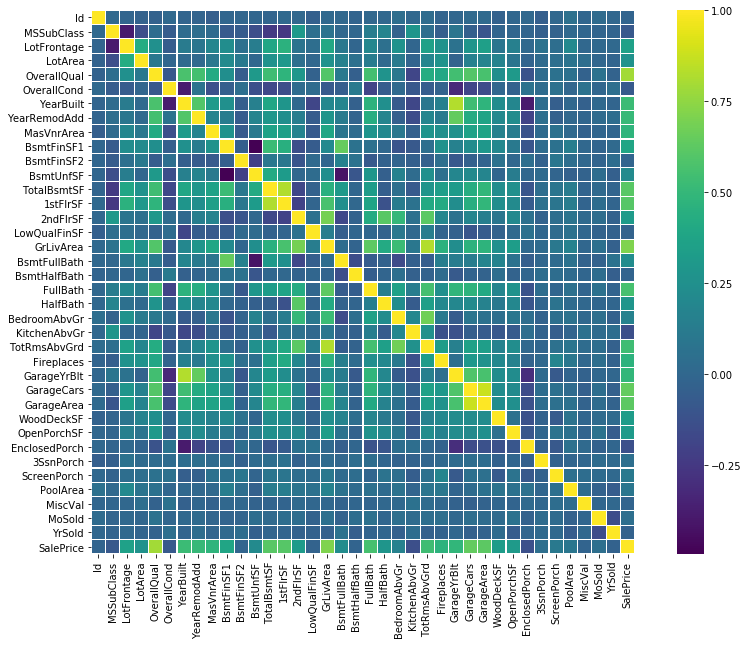

In [14]:
# Plotting a correlation heatmap.
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), cmap='viridis', linewidths=.1, square=True)

In [122]:
# Extracting the highly correlated features with the SalePrice - Using a threshold of 0.6.
corr_SalePrice = df_train.corr()['SalePrice']
columns = corr_SalePrice[((corr_SalePrice < -0.6) | (corr_SalePrice > 0.6))].index

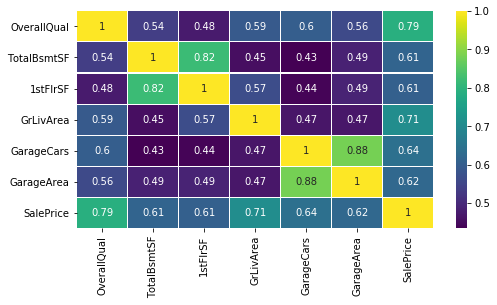

In [123]:
# Simplified heatmap of the most correlated features...
plt.figure(figsize=(8,4))
sns.heatmap(df_train[columns].corr(), cmap='viridis', linewidths=.1, annot=True)

In [124]:
# TotalBsmtSF has a strong correlation w/ 1stFlrSF.

# GarageCars and GarageArea are strongly correlated - Wich makes sense. I'm keeping GarageCars.
df_train.drop('GarageArea', axis=1, inplace=True)